### 1. Import Required Libraries

* Setup connection with SnowFlake

In [ ]:
import pandas as pd

# Load the uploaded Excel file to check its content
file_path = 'Datasheettttttt.xlsx'
data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
data.sheet_names


['Sheet1']

In [ ]:
#pip install openpyxl

In [ ]:
# Load the content of the first sheet into a DataFrame to review the data structure
sheet1_data = data.parse('Sheet1')

# Display the first few rows of the sheet to understand its content
sheet1_data.head()


,Sl.No,Sudents Name,Gender,Age,Grade,Learning preference,Fav Character,Fav Game,Preferable Subject,Enjoying activity,Communication Skills,Interest level,Cognitive skills,Intrested Phone Games,Screentime,Attention Span,Engagement Level,Teachers review,Feedback
0,1,Saaban,Male,4.5,A,Offline,Doremon,Hide and seek,GK,Reels,low,Medium,High,Angry Birds,1,high,high,Silent,Good
1,2,Ganavi,Female,3.5,A,Offline,Dora,running,Maths,using mobile,medium,high,High,carrom,2,high,high,proactive,Good
2,3,Dhruva,Male,4.0,B,Offline,zig and sharko,Hopscotch,english,using mobile,medium,medium,medium,carrom,3,medium,medium,silent,Good
3,4,Krish,male,4.0,A,Oniline,Batman,Swing,GK,Tv,high,high,low,Youtube,1,low,high,proactive,Good
4,5,Bhuminath,male,4.5,A,Online,Motu pathlu,Swing,maths,Tv,high,high,High,toutube,1,high,high,proactive,Good


'learning_preference_vs_grade.png'

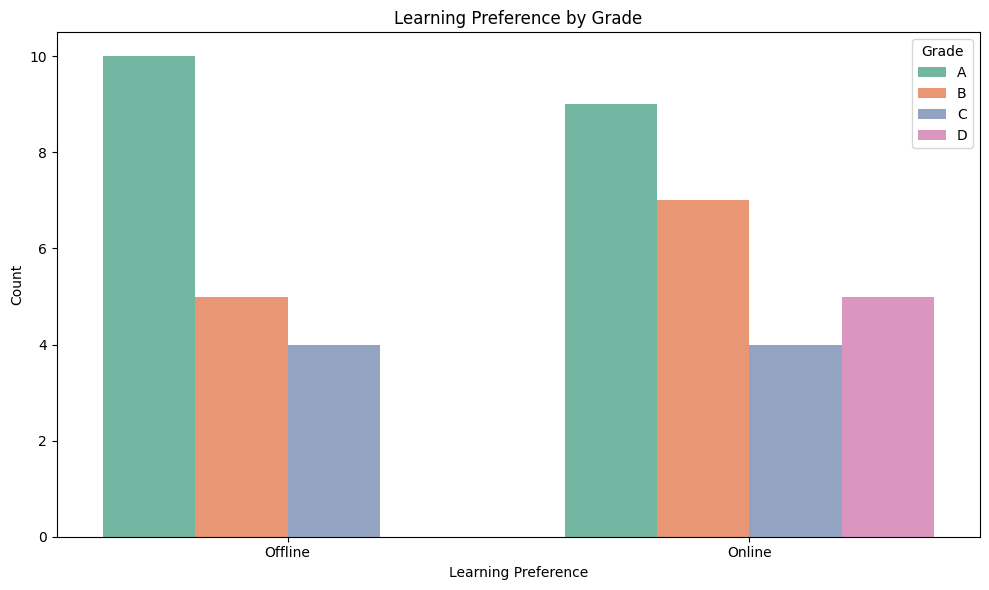

In [ ]:
# Plot Learning Preference vs Grade as a bar chart
# Correct the spelling error in the 'Learning preference' column
sheet1_data['Learning preference'] = sheet1_data['Learning preference'].replace('Oniline', 'Online')

# Verify the change
corrected_values = sheet1_data['Learning preference'].unique()
corrected_values

plt.figure(figsize=(10, 6))
sns.countplot(data=sheet1_data, x="Learning preference", hue="Grade", palette="Set2")
plt.title("Learning Preference by Grade")
plt.xlabel("Learning Preference")
plt.ylabel("Count")
plt.legend(title="Grade")
plt.tight_layout()

# Save the plot as a file
plot_path = "learning_preference_vs_grade.png"
plt.savefig(plot_path)

# Display the path of the saved plot for download
plot_path


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Prepare the dataset by encoding categorical variables
data = sheet1_data.copy()

# Label encoding for categorical variables
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Define features and target variable
X = data.drop(columns=["Teachers review", "Feedback"])
y = data["Teachers review"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = classification_report(y_test, y_pred, output_dict=True)

import pandas as pd
# Prepare the results for display
model_results = pd.DataFrame({
    model_name: {
        "Precision": results[model_name]["weighted avg"]["precision"],
        "Recall": results[model_name]["weighted avg"]["recall"],
        "F1-Score": results[model_name]["weighted avg"]["f1-score"]
    }
    for model_name in results
})



Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [31]:
model_results

,Random Forest,Support Vector Machine,Logistic Regression
Precision,0.818182,0.208333,0.660714
Recall,0.714286,0.214286,0.500000
F1-Score,0.688889,0.210256,0.558442


In [32]:
# pip install --upgrade pandas


In [33]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')


In [34]:
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Updated base learners with optimized parameters
base_learners = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                           n_estimators=100, max_depth=3, learning_rate=0.1, n_jobs=-1))
]

# Meta-model
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Hybrid model using stacking
hybrid_rf_xgb_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=3)

# Train the hybrid model
hybrid_rf_xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_hybrid_rf_xgb = hybrid_rf_xgb_model.predict(X_test)
hybrid_rf_xgb_results = classification_report(y_test, y_pred_hybrid_rf_xgb, output_dict=True)

# Append the hybrid model results
model_results["Hybrid (RF + XGBoost)"] = {
    "Precision": hybrid_rf_xgb_results["weighted avg"]["precision"],
    "Recall": hybrid_rf_xgb_results["weighted avg"]["recall"],
    "F1-Score": hybrid_rf_xgb_results["weighted avg"]["f1-score"]
}


[23:38:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:38:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:38:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

[23:38:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



In [35]:
model_results

,Random Forest,Support Vector Machine,Logistic Regression,Hybrid (RF + XGBoost)
Precision,0.818182,0.208333,0.660714,0.577778
Recall,0.714286,0.214286,0.500000,0.571429
F1-Score,0.688889,0.210256,0.558442,0.562500


Random Forest Model Evaluation Metrics:


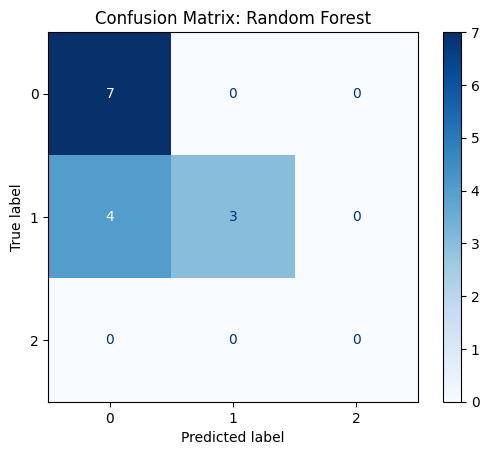

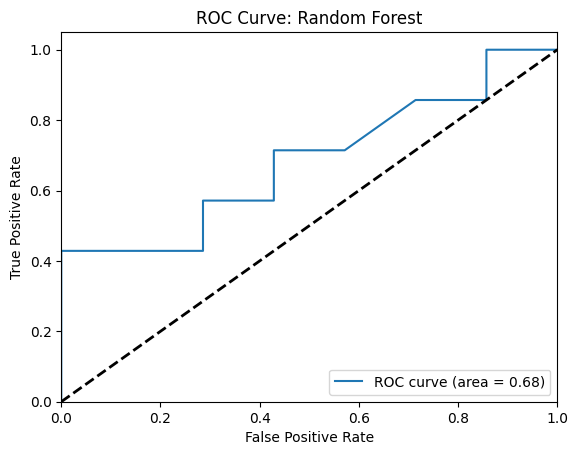

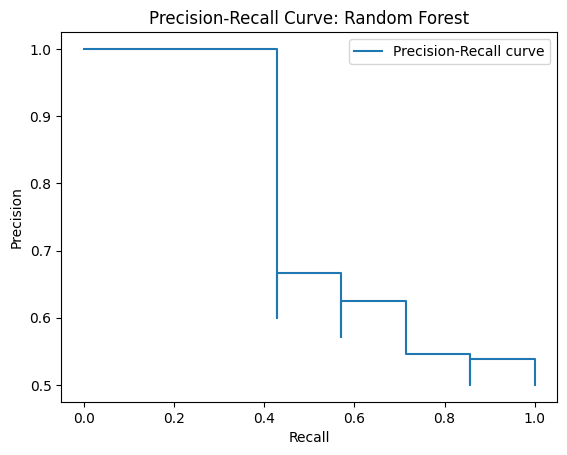

Hybrid (RF + XGBoost) Model Evaluation Metrics:


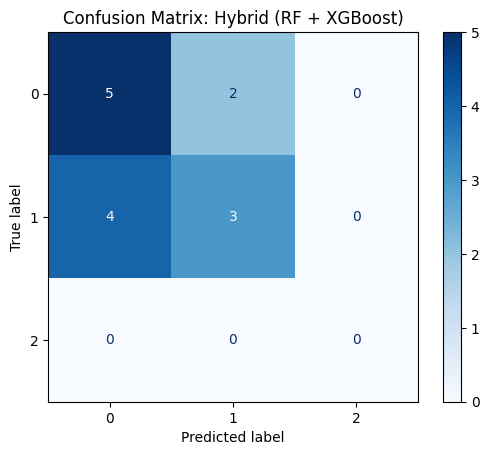

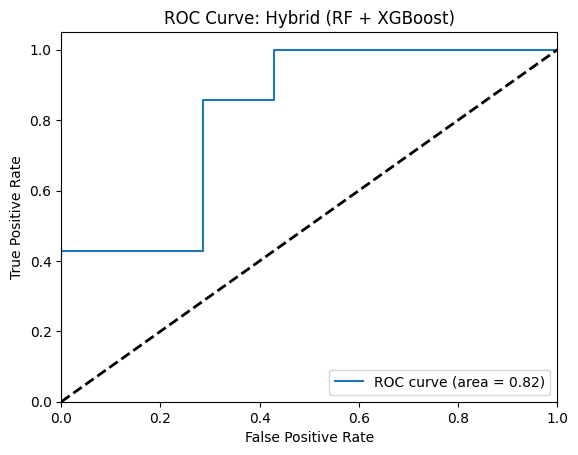

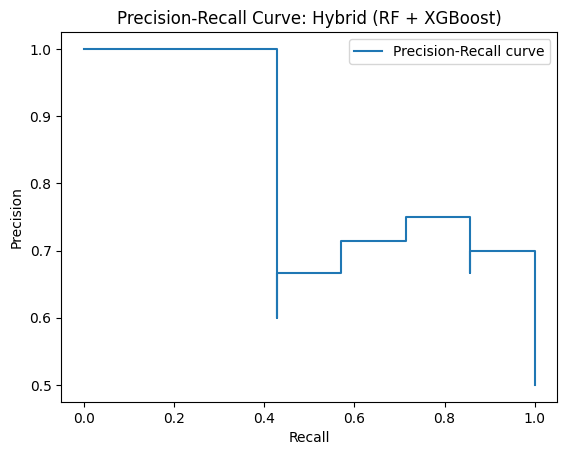

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {title}")
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, title):
    y_prob = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=model.classes_[1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {title}")
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(model, X_test, y_test, title):
    y_prob = model.predict_proba(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1], pos_label=model.classes_[1])
    plt.figure()
    plt.step(recall, precision, where='post', label="Precision-Recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {title}")
    plt.legend()
    plt.show()

# Visualize for Random Forest
print("Random Forest Model Evaluation Metrics:")
plot_confusion_matrix(RandomForestClassifier(random_state=42).fit(X_train, y_train), X_test, y_test, "Random Forest")
plot_roc_curve(RandomForestClassifier(random_state=42).fit(X_train, y_train), X_test, y_test, "Random Forest")
plot_precision_recall_curve(RandomForestClassifier(random_state=42).fit(X_train, y_train), X_test, y_test, "Random Forest")

# Visualize for Hybrid (RF + XGBoost)
print("Hybrid (RF + XGBoost) Model Evaluation Metrics:")
plot_confusion_matrix(hybrid_rf_xgb_model, X_test, y_test, "Hybrid (RF + XGBoost)")
plot_roc_curve(hybrid_rf_xgb_model, X_test, y_test, "Hybrid (RF + XGBoost)")
plot_precision_recall_curve(hybrid_rf_xgb_model, X_test, y_test, "Hybrid (RF + XGBoost)")


In [37]:
#pip install --upgrade llvmlite numba
#pip install shap --force-reinstall

Random Forest Feature Importances:
                  Feature  Importance
10   Communication Skills    0.212694
1            Sudents Name    0.097411
0                   Sl.No    0.091553
11         Interest level    0.080049
13  Intrested Phone Games    0.071647
2                  Gender    0.067555
5     Learning preference    0.054003
6           Fav Character    0.052471
14             Screentime    0.047458
9       Enjoying activity    0.036281
7                Fav Game    0.035812
8      Preferable Subject    0.034222
3                     Age    0.032692
15         Attention Span    0.028841
4                   Grade    0.023377
12       Cognitive skills    0.017958
16       Engagement Level    0.015976


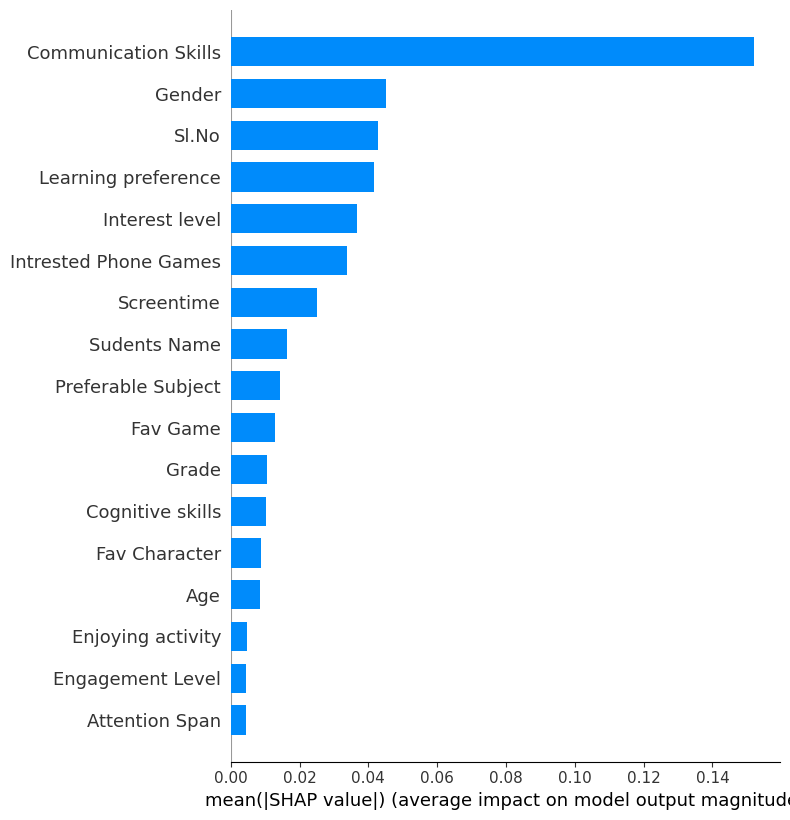

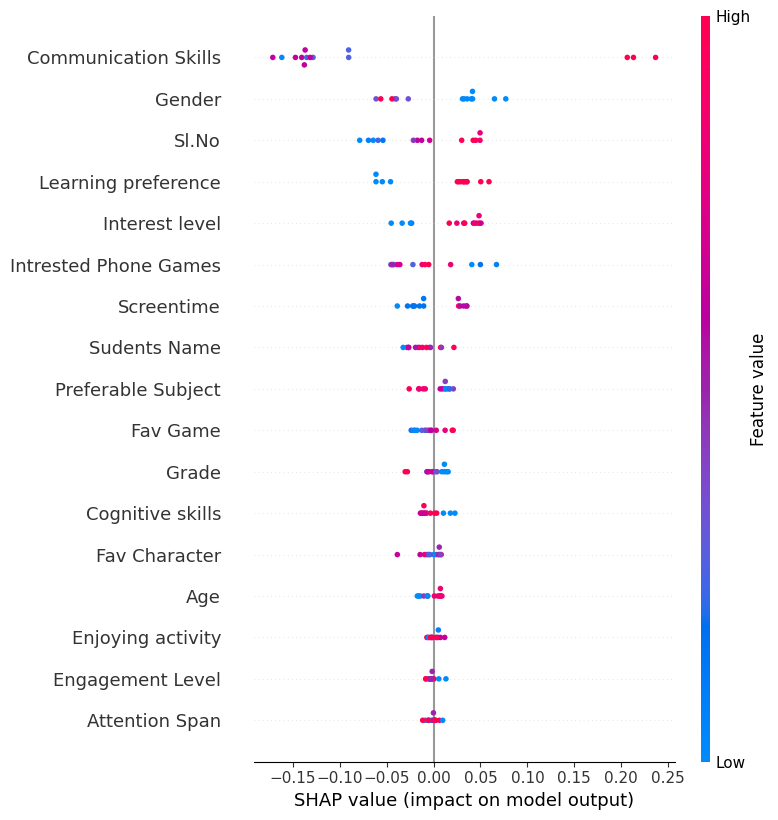

In [38]:
import shap
from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest model for SHAP analysis
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Random Forest Feature Importances:")
print(feature_importances)

# SHAP analysis (if needed and setup is correct)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary for better feature interpretation
shap.summary_plot(shap_values[1], X_test, plot_type="bar")  # For class 1
shap.summary_plot(shap_values[1], X_test)  # Full summary plot


In [39]:
# pip install --upgrade scikit-learn


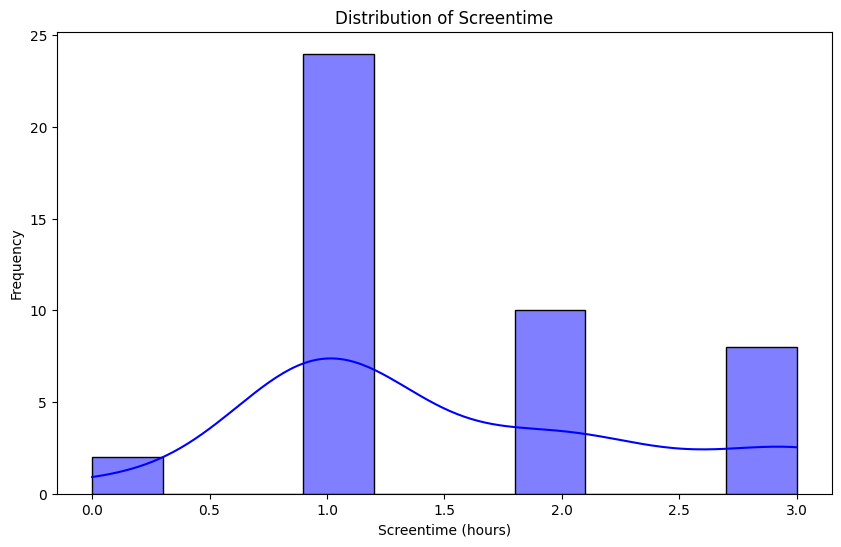

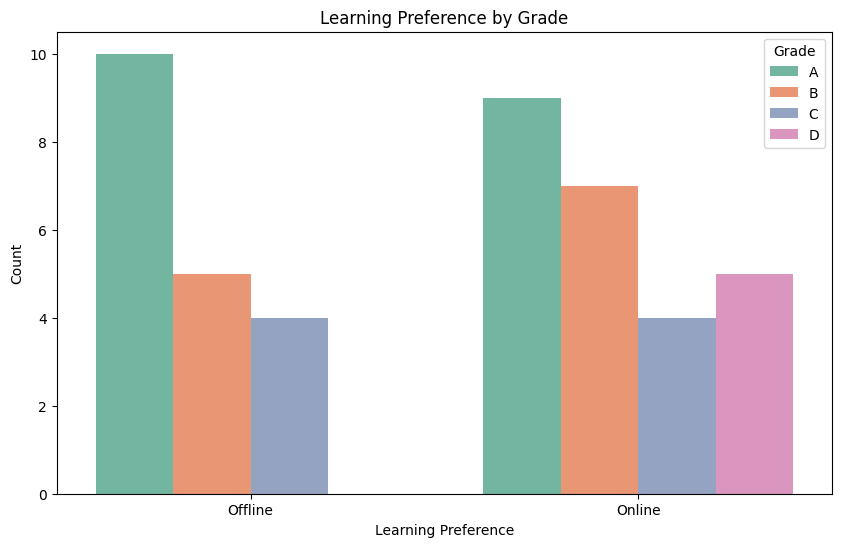

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x600 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function for displaying multiple EDA plots
def plot_eda(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Screentime'], kde=True, bins=10, color="blue")
    plt.title("Distribution of Screentime")
    plt.xlabel("Screentime (hours)")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x="Learning preference", hue="Grade", palette="Set2")
    plt.title("Learning Preference by Grade")
    plt.xlabel("Learning Preference")
    plt.ylabel("Count")
    plt.legend(title="Grade")
    plt.show()
    cognitive_mapping = {"low": 1, "medium": 2, "high": 3}
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x="Gender", y="Cognitive skills", palette="Set3")
    plt.title("Cognitive Skills by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Cognitive Skills")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x="Age", y="Attention Span", hue="Interest level", palette="viridis")
    plt.title("Attention Span vs Age Colored by Interest Level")
    plt.xlabel("Age")
    plt.ylabel("Attention Span")
    plt.legend(title="Interest Level")
    plt.show()

    plt.figure(figsize=(10, 6))
    corr = data.select_dtypes(include=['int64', 'float64']).corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# Call the function with the dataset
plot_eda(sheet1_data)


In [ ]:
# Map 'Cognitive skills' levels to numeric values
cognitive_mapping = {"low": 1, "medium": 2, "high": 3}



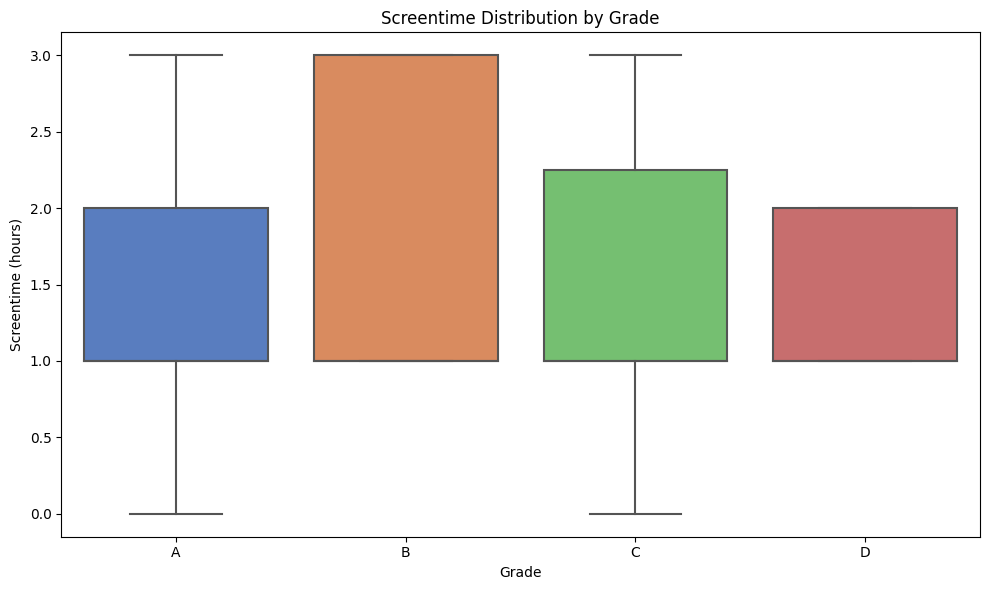

'grades_vs_screentime.png'

In [47]:
# Plot a boxplot: Grades vs Screentime
plt.figure(figsize=(10, 6))
sns.boxplot(data=sheet1_data, x="Grade", y="Screentime", palette="muted")
plt.title("Screentime Distribution by Grade")
plt.xlabel("Grade")
plt.ylabel("Screentime (hours)")
plt.tight_layout()

# Save the plot to a file
boxplot_path = "grades_vs_screentime.png"
plt.savefig(boxplot_path)
plt.show()
plt.close()

# Provide the saved plot path for user download
boxplot_path


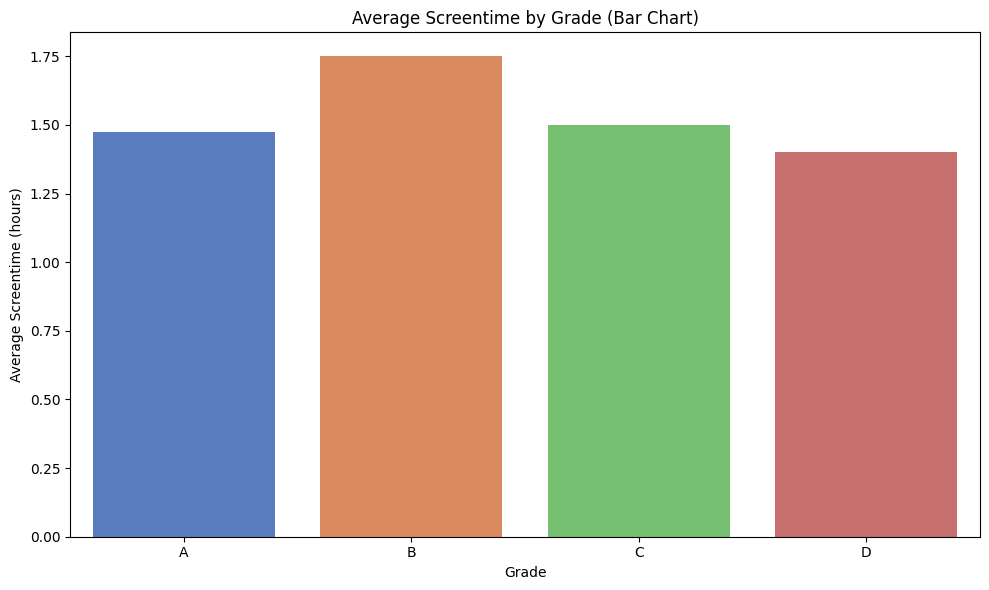

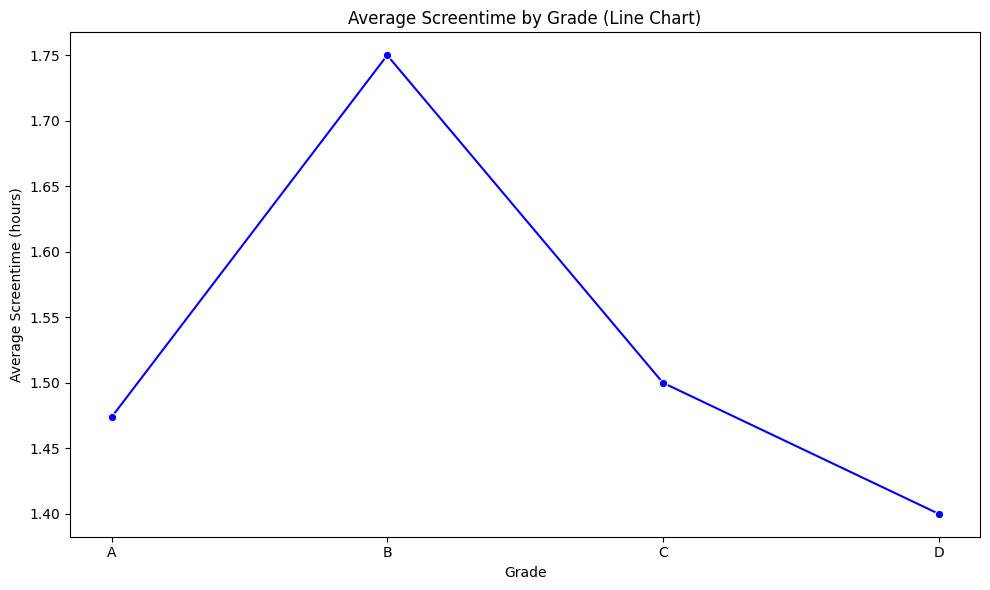

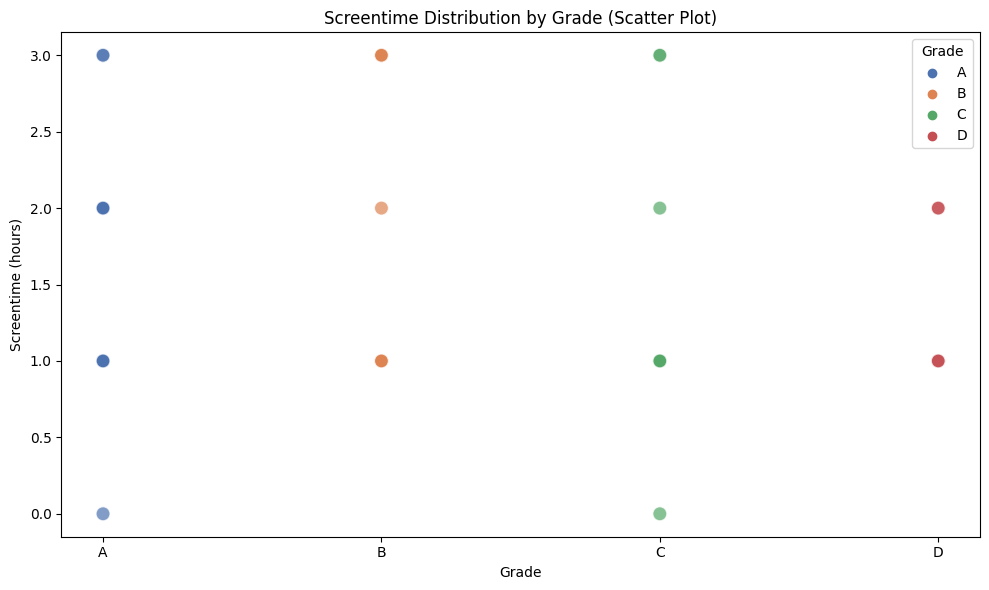

In [48]:
# Aggregate Screentime by Grade for a bar and line plot
grade_screentime = sheet1_data.groupby("Grade")["Screentime"].mean().reset_index()

# Plot a bar chart for Screentime by Grade
plt.figure(figsize=(10, 6))
sns.barplot(data=grade_screentime, x="Grade", y="Screentime", palette="muted")
plt.title("Average Screentime by Grade (Bar Chart)")
plt.xlabel("Grade")
plt.ylabel("Average Screentime (hours)")
plt.tight_layout()
plt.show()

# Plot a line chart for Screentime by Grade
plt.figure(figsize=(10, 6))
sns.lineplot(data=grade_screentime, x="Grade", y="Screentime", marker="o", color="blue")
plt.title("Average Screentime by Grade (Line Chart)")
plt.xlabel("Grade")
plt.ylabel("Average Screentime (hours)")
plt.tight_layout()
plt.show()

# Scatter plot for Screentime by Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sheet1_data, x="Grade", y="Screentime", hue="Grade", palette="deep", s=100, alpha=0.7)
plt.title("Screentime Distribution by Grade (Scatter Plot)")
plt.xlabel("Grade")
plt.ylabel("Screentime (hours)")
plt.tight_layout()
plt.show()
